In [11]:
import pandas as pd
import json
import io
import numpy as np
import os

#docker exec -it kcat kcat -b kafka-1:19092 -t temp -C -s value=avro -r http://schema-registry-1:8081 > player250101463.json -e
#docker exec -it kcat kcat -b kafka-1:19092 -t general_01_player_ball -C -s value=avro -r http://schema-registry-1:8081 > playerAll.json -e

dirname = os.path.join(os.getcwd(), "output")
#filename
input_filename = os.path.join(dirname, 'player250101463.json')
#input_filename = os.path.join(dirname, 'playerAll.json')

output_filename = os.path.join(dirname, input_filename.replace(".","real."))

counter = 10000

try:
    os.remove(output_filename)
    print("old file removed")
except OSError:
    pass

temp_filename = os.path.join(dirname, input_filename.replace(".","real.")+'temp')
with open(temp_filename, 'wt') as output_file:
    output_file.write('[')
    with open(input_filename, 'rt', encoding="utf-16") as input_file:
        for i, input_line in enumerate(input_file):
            if '"velocity": null, "accelleration": null, "distance": null' in input_line:
                pass
            if not "% Reached end of topic" in input_line:
                # Assuming that output_line will have a trailing newline.
                line = input_line.replace('{"double": ', '"').replace('},','",').replace('}}', '"}')+','
                #line = input_line.replace('{"double": ', '').replace('},',',').replace('}}', '}')+','
                output_file.write(line)
                #output_file.write(input_line.replace('}}', '}},'))
            if i == counter:
                counter = counter + 10000
                print(i)
    output_file.write("]")

#remove comma from last element
with open(output_filename+'temp', 'r', encoding='utf-8') as f:
    data = f.readlines()
data[-1] = data[-1].replace(',]', ']')
with open(output_filename, 'w', encoding='utf-8') as f:
    f.writelines(data)
os.remove(output_filename+'temp')

print("write {} done".format(output_filename))

print("write to pickle file for faster loading")
df = pd.read_json(output_filename, encoding='utf-8')
df.to_pickle(output_filename+".pkl")
print("write {} done".format(output_filename+".pkl"))

old file removed
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
write c:\WORK\GIT_ROOT\MAS2022DataScience\kafka-platform-platys\dataquality\output\player250101463real.json done
write to pickle file for faster loading
write c:\WORK\GIT_ROOT\MAS2022DataScience\kafka-platform-platys\dataquality\output\player250101463real.json.pkl done


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

dirname = os.path.join(os.getcwd(), "output")
#filename
#filename = os.path.join(dirname, 'player250101463real.json')
filename = os.path.join(dirname, 'playerAllreal.json')

df = pd.read_pickle(filename+".pkl")
#df['distance1'] = euclidean_distance(df['x'], df['x'].shift(1), df['y'], df['y'].shift(1))
print(df.columns)

Index(['ts', 'id', 'x', 'y', 'z', 'velocity', 'accelleration', 'distance'], dtype='object')


# Distance

Number of data points: 3324936

count    3.324936e+06
mean     8.953602e-02
std      4.527678e-01
min      0.000000e+00
25%      3.605551e-02
50%      6.082763e-02
75%      1.100000e-01
max      1.019007e+02
Name: distance, dtype: float64

distance_max: 0.41



,ts,id,x,y,z,velocity,accelleration,distance
0,1559760409443,250046574,1006,2209,0,-0.004109,0.002154,5.568707
1,1559760409443,250101463,182,-1448,0,-0.013911,0.000951,18.850414
2,1559760409443,250066156,-1547,2123,0,-0.013259,0.003036,17.968194
3,1559760409443,1905363,351,-1625,0,-0.012297,0.000674,16.664108
4,1559760409443,250011089,1096,-1711,0,-0.010761,0.000673,14.582815
5,1559760409443,250055271,-501,1755,0,-0.005905,0.002108,8.001562


Values above 0.41: 32605


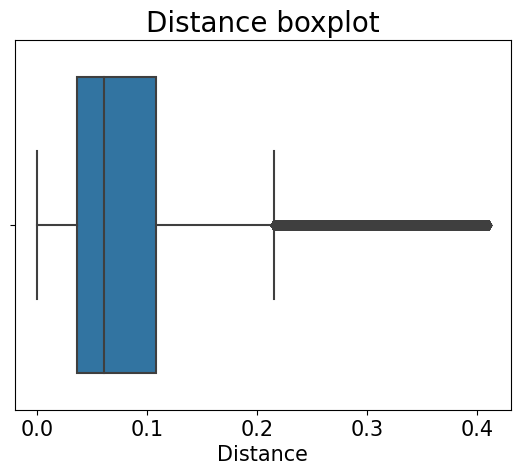

In [6]:
print("Number of data points:",df['distance'].count())
print()

print(df['distance'].describe())
print()

#v=s/t
#v_max= Weltrekordhalter Arjen Robben mit 37 km/h (10.2m/s)
#s_max=v_max t=10,2m/s∗0.04s= 0.408m = 40.8cm
#t=40ms

# distance_max = mean of all values + 3x standard deviation
#distance_max = df['distance'].mean() + (3*df['distance'].std())
# this is not a good value as the max distance within a timeslot of 40ms and a max velocity of 10.2m/s is 40.8cm = .408m
distance_max = 0.41
print("distance_max:",distance_max)

# remove ball !!!!
df = df[df['id'] != "0"]

print()
display(df[df['distance'] > distance_max].head(6))

print("Values above "+str(distance_max)+":", df[df['distance']>distance_max]['ts'].count())

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.boxplot(x=df[df['distance']<distance_max]['distance'], ax=ax), ax.set_title('Distance boxplot', fontsize=20), ax.set_xlabel('Distance', fontsize=15)
plt.xticks(fontsize=15)
plt.savefig(os.path.join(dirname, 'distance_boxplot.png'))

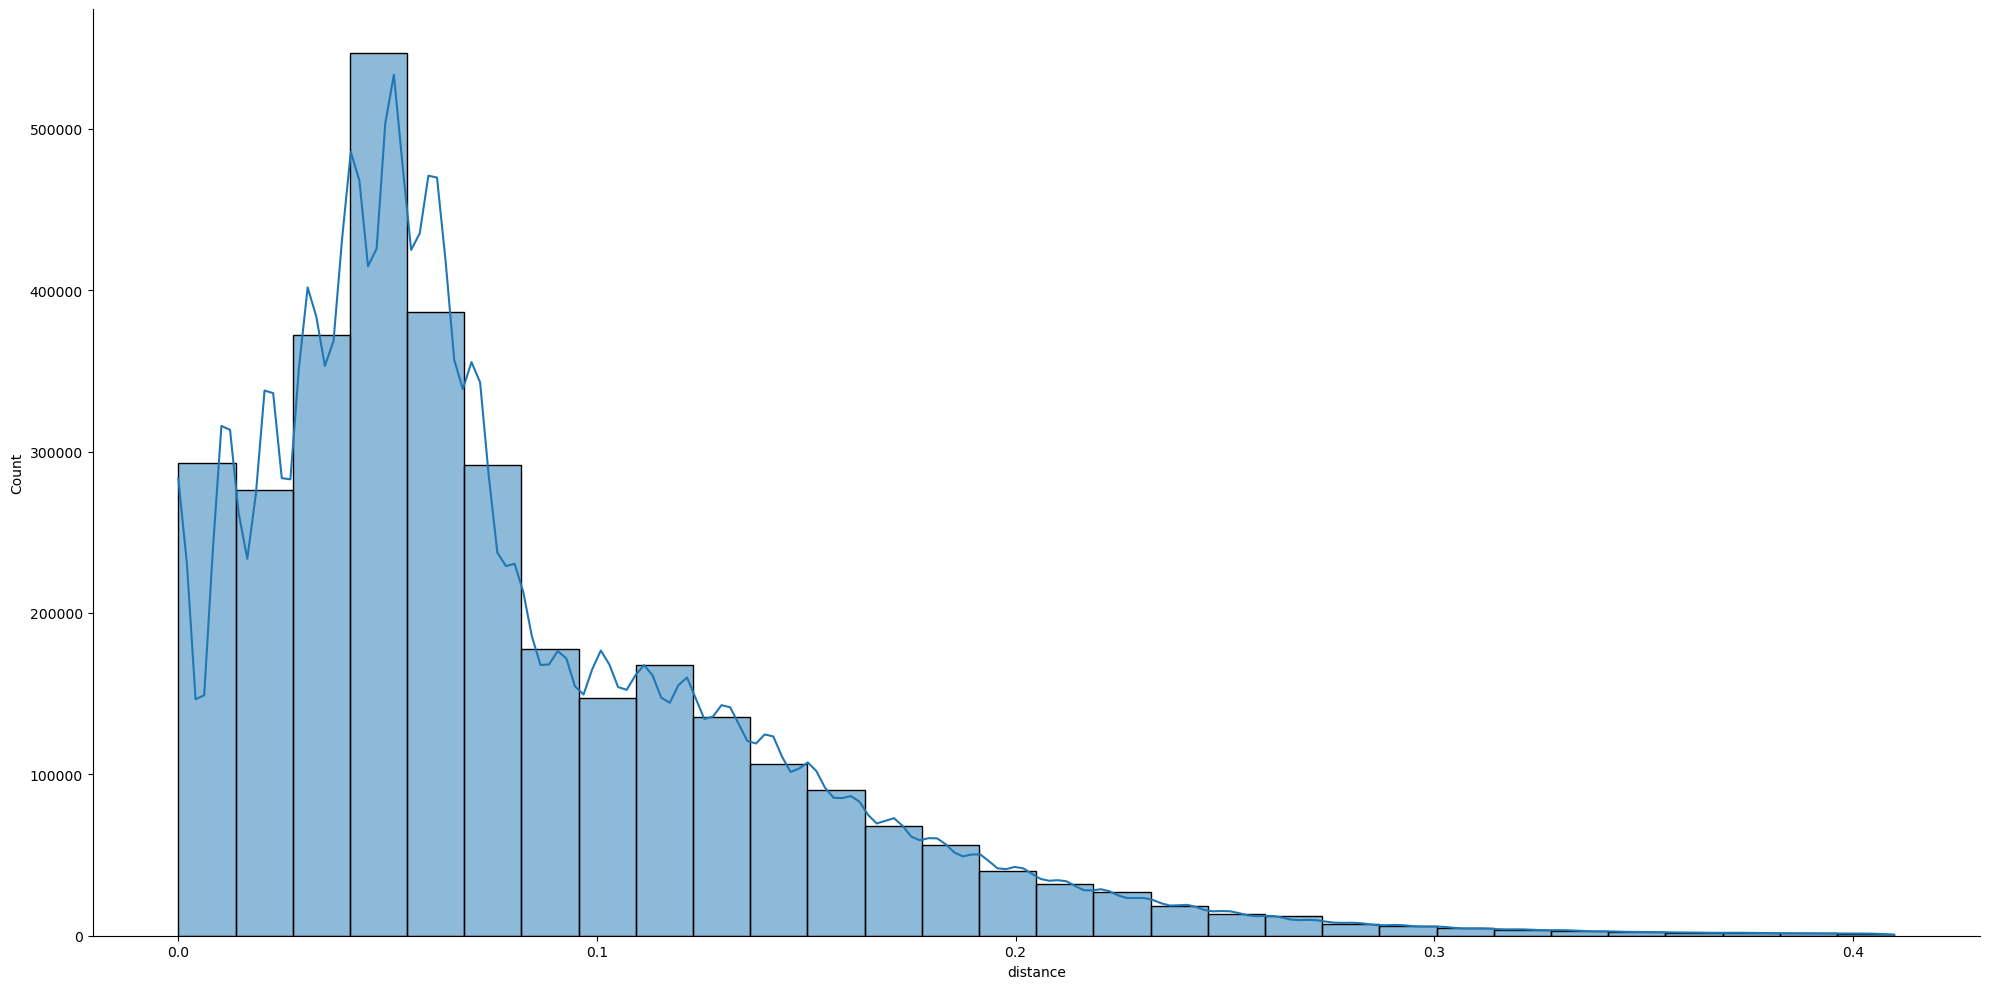

In [7]:
sns.displot(df[df['distance']<distance_max]['distance'], bins=30, kde=True, height=10, aspect=2).savefig(os.path.join(dirname, 'distance_hist.png'))

# Velocity

Number of data points: 3324936

count    3.324936e+06
mean     2.229166e+00
std      1.086673e+01
min     -2.678860e-02
25%      9.013878e-01
50%      1.520691e+00
75%      2.750000e+00
max      2.223795e+03
Name: velocity, dtype: float64

velocity_max: 10.5



,ts,id,x,y,z,velocity,accelleration,distance
7013,1559760444483,250055271,1956,1662,0,278.403709,6828.693991,11.136148
9863,1559760458723,250002548,-1242,1859,0,260.321196,6462.529209,10.412848
13328,1559760409483,0,-896,196,28,12.644169,316.488490,0.505767
13337,1559760409523,0,-944,193,21,12.150103,-12.351643,0.486004
13346,1559760409563,0,-990,209,23,12.186058,0.898868,0.487442
13355,1559760409603,0,-1037,224,27,12.374369,4.707777,0.494975


Values above 10.5: 31487


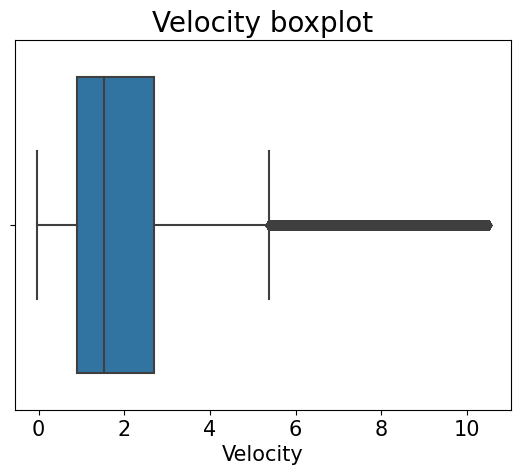

In [8]:
print("Number of data points:",df['velocity'].count())
print()

#df.hist(column='distance', bins=100, edgecolor='black')
print(df['velocity'].describe())
print()

#v=s/t
#v_max= Weltrekordhalter Arjen Robben mit 37 km/h (10.2m/s)
#s_max=v_max t=10,2m/s∗0.04s= 0.408m = 40.8cm
#t=40ms

# distance_max = mean of all values + 3x standard deviation
#velocity_max = df['velocity'].mean() + (3*df['velocity'].std()) # 34.8m/s
# this is not a good value as the max velocity is 10.2m/s
velocity_max = 10.5

print("velocity_max:",velocity_max)

# remove ball !!!!
df = df[df['id'] != "0"]

print()
display(df[df['velocity'] > velocity_max].head(6))


print("Values above "+str(velocity_max)+":", df[df['velocity']>velocity_max]['ts'].count())

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.boxplot(x=df[df['velocity']<velocity_max]['velocity'], ax=ax), ax.set_title('Velocity boxplot', fontsize=20), ax.set_xlabel('Velocity', fontsize=15)
plt.xticks(fontsize=15)
plt.savefig(os.path.join(dirname, 'velocity_boxplot.png'))

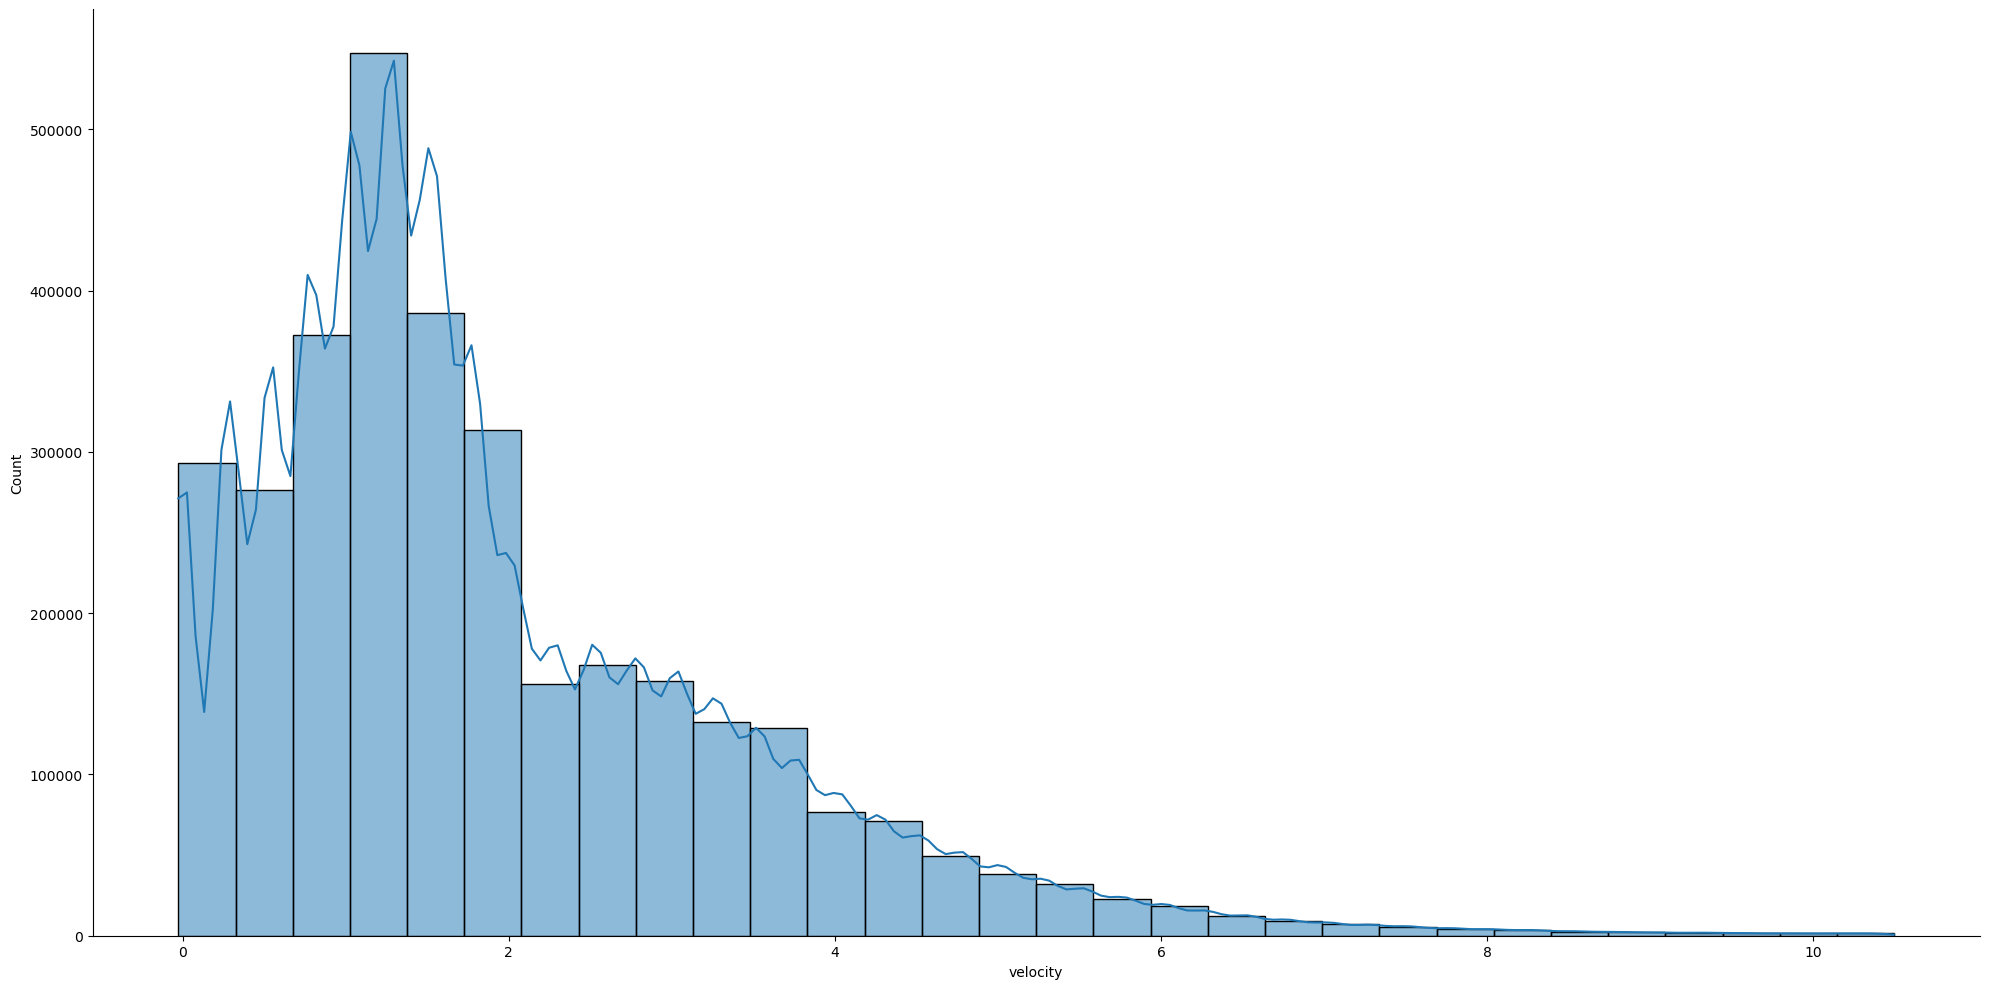

In [9]:
sns.displot(df[df['velocity']<velocity_max]['velocity'], bins=30, kde=True, height=10, aspect=2).savefig(os.path.join(dirname, 'velocity_hist.png'))

# Outlier example

,ts,id,x,y,z,velocity,accelleration,distance
no,,,,,,,,
4070,1559760572323,250101463,-842,-3025,0,0.000000,0.000000,0.000000
4071,1559760572363,250101463,-842,-3025,0,0.000000,0.000000,0.000000
4072,1559760572403,250101463,-842,-3025,0,0.000000,0.000000,0.000000
4073,1559760572443,250101463,-842,-3025,0,0.000000,0.000000,0.000000
4074,1559760572483,250101463,-842,-3025,0,0.000000,0.000000,0.000000
4075,1559760572523,250101463,-842,-3025,0,0.000000,0.000000,0.000000
4076,1559760572563,250101463,-842,-3025,0,0.000000,0.000000,0.000000
4077,1559760572603,250101463,-842,-3025,0,0.000000,0.000000,0.000000
4078,1559760572643,250101463,-842,-3025,0,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='x'>

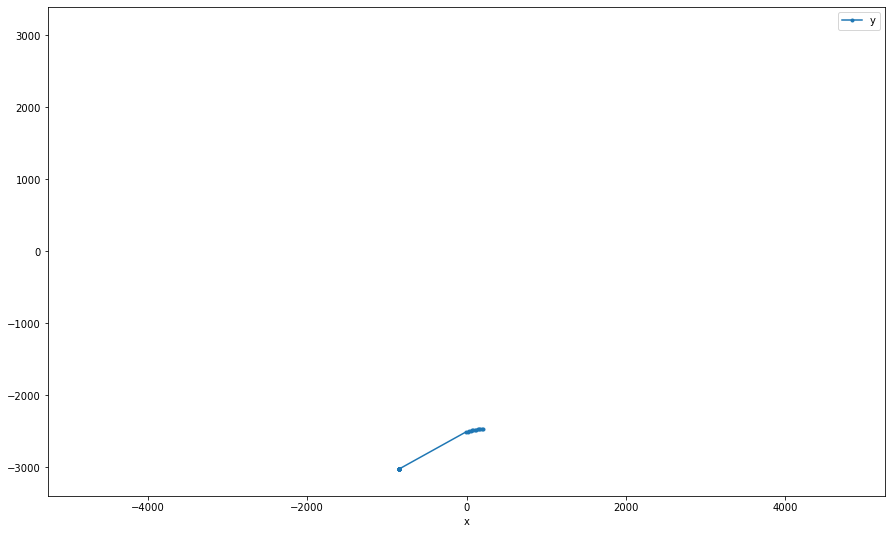

In [ ]:
value = 4085
plusminus = 15
subset = df[value-plusminus:value+plusminus]
display(subset)
subset.plot(x='x', y='y', marker='.', figsize=(15,9),xlim=(-5250,5250), ylim=(-3400,3400))

<AxesSubplot:xlabel='accelleration', ylabel='velocity'>

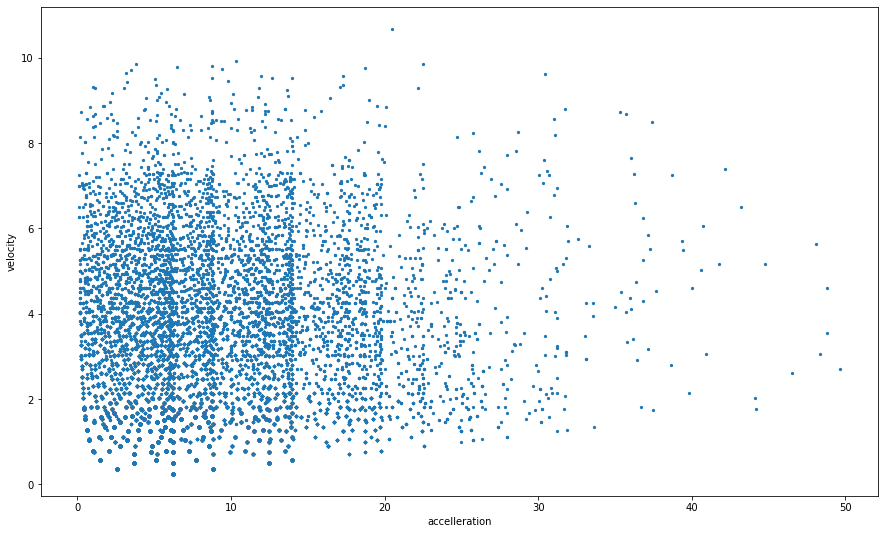

In [ ]:
df2 = df[df['distance'] < 50]
df2 = df2[df2['accelleration'] > 0]
df2 = df2[df2['accelleration'] < 50]
df2.plot.scatter(x='accelleration', y='velocity', marker='.', figsize=(15,9))

<AxesSubplot:xlabel='accelleration', ylabel='velocity'>

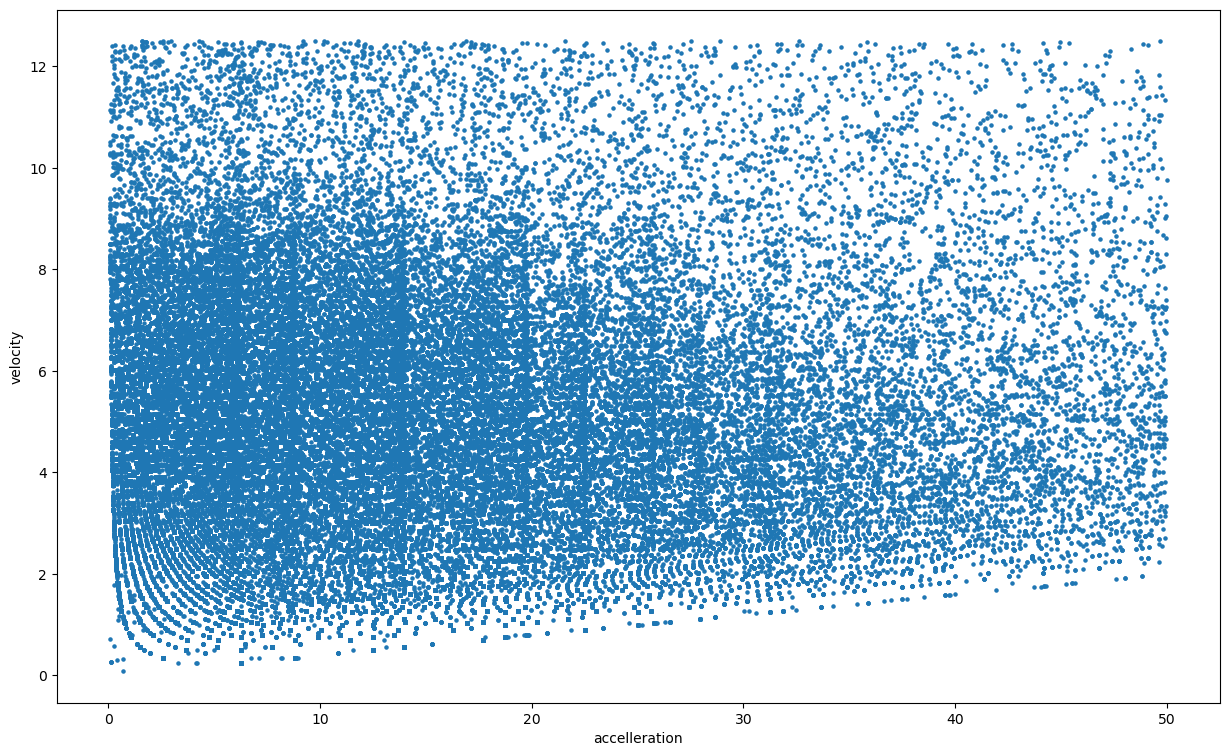

In [2]:
df2 = df[df['distance'] < 50]
df2 = df2[df2['accelleration'] > 0]
df2 = df2[df2['accelleration'] < 50]
df2.plot.scatter(x='accelleration', y='velocity', marker='.', figsize=(15,9))